In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datasets import create_dataframe_pac_2018

In [3]:
df = create_dataframe_pac_2018(
    path_data_nii='/home/glemaitre/Documents/data/pac_2018/public_data/',
    path_data_xls='/home/glemaitre/Documents/data/pac_2018/PAC2018_Covariates_Upload.xlsx')

In [4]:
df.head()

,Label,Age,Gender,TIV,t1
PAC_ID,,,,,
PAC2018_0001,1,56,1,1793.000000,/home/glemaitre/Documents/data/pac_2018/public...
PAC2018_0002,1,21,1,1565.049438,/home/glemaitre/Documents/data/pac_2018/public...
PAC2018_0004,1,33,2,1525.000000,/home/glemaitre/Documents/data/pac_2018/public...
PAC2018_0005,1,33,1,1800.000000,/home/glemaitre/Documents/data/pac_2018/public...
PAC2018_0006,1,61,2,1433.959595,/home/glemaitre/Documents/data/pac_2018/public...


## Gender distribution

In [5]:
df_gender = df['Gender'].value_counts().to_frame().T.rename(index={'Gender': 'public\nset'})

In [6]:
df_gender_norm = df_gender.div(df_gender.sum(axis=1), axis=0)

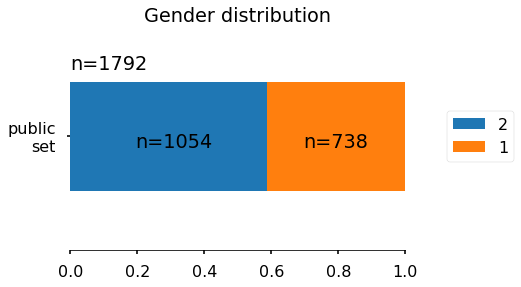

In [7]:
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()
    df_gender_norm.plot.barh(stacked=True, ax=ax)

    sns.despine(offset=5, left=True)
    ax.set_xlim([0, 1])
    plt.title('Gender distribution')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    n_patients = {}
    
    for p, idx in zip(ax.patches, [0, 1]):
        ax.annotate('n={:}'.format(int(df_gender.values.reshape(-1)[idx])),
                    (p.get_x() + (p.get_width() / 2) - 0.1, (p.get_y() + p.get_height() / 2.5)))
        n_patients[str(p.get_y())] = p.get_y()
    
    for (key, value), total_patients in zip(n_patients.items(), df_gender.sum(axis=1).values):
        ax.annotate('n={:}'.format(total_patients), (0, value + 0.56))

## Age distribution

In [8]:
df_age = df[['Age', 'Gender']].rename(index={'Age': 'public\nset'})

In [9]:
df_age[""] = ""

In [10]:
df_age.head()

,Age,Gender,
PAC_ID,,,
PAC2018_0001,56,1,
PAC2018_0002,21,1,
PAC2018_0004,33,2,
PAC2018_0005,33,1,
PAC2018_0006,61,2,


/home/glemaitre/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/home/glemaitre/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/home/glemaitre/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


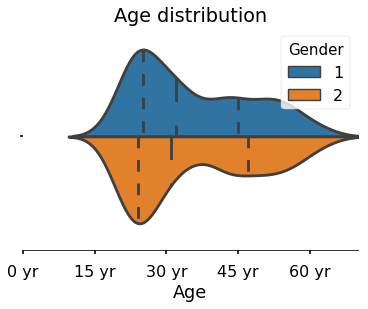

In [11]:
from matplotlib.ticker import FormatStrFormatter
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()

    sns.violinplot(x="Age", y="", hue='Gender', data=df_age, split=True,
                   inner="quart", ax=ax, scale='width')
    ax.set_xlim([0, 70])

    sns.despine(offset=5, left=True)
    plt.title('Age distribution')
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d yr'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

## Label distribution

In [12]:
df_label = df['Label'].value_counts().to_frame().T.rename(index={'Label': 'public\nset'})

In [13]:
df_label_norm = df_label.div(df_label.sum(axis=1), axis=0)

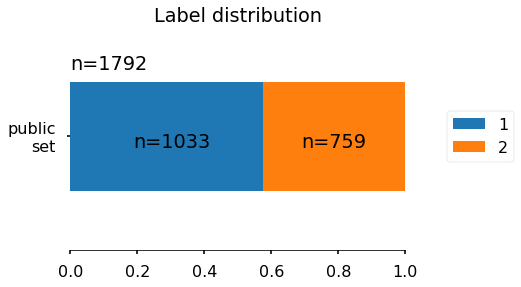

In [14]:
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()
    df_label_norm.plot.barh(stacked=True, ax=ax)

    sns.despine(offset=5, left=True)
    ax.set_xlim([0, 1])
    plt.title('Label distribution')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    n_patients = {}
    
    for p, idx in zip(ax.patches, [0, 1]):
        ax.annotate('n={:}'.format(int(df_label.values.reshape(-1)[idx])),
                    (p.get_x() + (p.get_width() / 2) - 0.1, (p.get_y() + p.get_height() / 2.5)))
        n_patients[str(p.get_y())] = p.get_y()
    
    for (key, value), total_patients in zip(n_patients.items(), df_label.sum(axis=1).values):
        ax.annotate('n={:}'.format(total_patients), (0, value + 0.56))

## Extract all T1 data

In [15]:
from nilearn import image
from nilearn.regions import Parcellations
path_mask = '/home/glemaitre/Documents/data/pac_2018/public_data/mask.nii.gz'
parcellations = Parcellations(method='ward', n_parcels=20000, mask=path_mask, n_jobs=-1)
#X_t1 = parcellations.fit_transform(image.concat_imgs(df['t1'][:10]))
X_t1 = parcellations.fit_transform(df['t1'].values)

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. , 

       [   0. ,    0. ,    0. ,

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMas

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals

[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affin

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
  

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning e

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Smoothing images


[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. , 

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   


[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfo

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. 

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Smoothing images

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMask

       [   0. ,    0. ,    0. ,[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals

[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=arra

Process ForkPoolWorker-27:
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-1:
Traceback (most recent call last):
Process ForkPoolWorker-3:
Process ForkPoolWorker-26:
Process ForkPoolWorker-45:
Traceback (most recent call last):
Process ForkPoolWorker-21:
Traceback (most recent call last):
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-31:
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File 

  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
KeyboardInterrupt
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 386, in put
    return send(obj)
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 372, in send
    self._writer.send_bytes(buffer.getvalue())
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/glema

  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/glemaitre/miniconda3/lib/pyth

  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/jo

Traceback (most recent call last):
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 699, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/home/glemaitre/miniconda3/lib/python3.6/multiprocessing/pool.py", line 635, in wait
    self._event.wait(timeout)
  File "/home/glemaitre/miniconda3/lib/python3.6/threading.py", line 551, in wait
    signaled = self._cond.wait(timeout)
  File "/home/glemaitre/miniconda3/lib/python3.6/threading.py", line 295, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/glemaitre/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15

TypeError: must be str, not list

In [17]:
X_t1.shape

(1792, 20000)

In [18]:
import numpy as np

In [19]:
np.save('parcellations.npy', X_t1)

In [20]:
import pandas as pd

In [27]:
df_parcellations = pd.DataFrame(X_t1, index=df.index)

In [28]:
df_parcellations.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
PAC_ID,,,,,,,,,,,,,,,,,,,,,
PAC2018_0001,0.050328,0.054789,0.113776,0.384858,0.402478,0.075708,0.393376,0.668100,0.352902,0.121808,...,0.560632,0.105432,0.593954,0.180242,0.431241,0.303193,0.334246,0.689017,0.580398,0.562207
PAC2018_0002,0.145355,0.075659,0.153889,0.470175,0.432636,0.064402,0.424334,0.334881,0.690654,0.078990,...,0.418249,0.089970,0.633708,0.176973,0.400016,0.242629,0.556480,0.252672,0.493913,0.571063
PAC2018_0004,0.082060,0.139595,0.001007,0.635882,0.281142,0.084597,0.405362,0.518624,0.346785,0.414061,...,0.483998,0.094208,0.389794,0.206434,0.560460,0.253094,0.304605,0.296596,0.461352,0.435080
PAC2018_0005,0.101072,0.060795,0.215709,0.578135,0.277741,0.082053,0.483197,0.537262,0.408704,0.387034,...,0.485879,0.094576,0.487725,0.197927,0.537770,0.440742,0.475004,0.468825,0.649759,0.597808
PAC2018_0006,0.055418,0.114415,0.177975,0.317042,0.321451,0.061500,0.399771,0.520809,0.441671,0.266863,...,0.360576,0.095270,0.506137,0.151750,0.395133,0.132673,0.479000,0.328133,0.344543,0.491920


In [30]:
df_parcellations.to_csv('parcellations.csv')

## Classification using parcellations data label

In [15]:
import pandas as pd

In [16]:
df_parcellations = pd.read_csv('parcellations.csv', index_col=0)

In [17]:
df_data = df[['Label', 'Age', 'Gender', 'TIV']]

In [18]:
df_data = pd.concat([df_data, df_parcellations], axis=1)

In [24]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

In [50]:
pipe = make_pipeline(StandardScaler(), LogisticRegressionCV(n_jobs=-1, random_state=42))

In [21]:
score = cross_validate(pipe, df_data[[str(i) for i in range(20000)]], df_data['Label'],
                       cv=StratifiedKFold(n_splits=10),
                       scoring=['roc_auc', 'balanced_accuracy'], n_jobs=-1,
                       return_train_score=True, verbose=1)

/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nest

/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to conve

/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to conve

/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to conve

/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/glemaitre/Documents/work/code/toolbox/scikit-learn/sklearn/linear_model/logistic.py:712: ConvergenceWarning: lbfgs failed to conve

In [22]:
score

{'fit_time': array([ 149.59918356,  135.99767685,  134.22324204,  155.25833416,
         137.22683907,  154.34499955,  154.17461085,  149.34237504,
         138.58164096,  153.00185847]),
 'score_time': array([ 0.33740139,  1.36005473,  0.5336225 ,  0.22325134,  0.29339194,
         0.25648189,  0.37120342,  0.36939692,  0.34501171,  0.10584259]),
 'test_roc_auc': array([ 0.6729504 ,  0.67408907,  0.64638158,  0.67373531,  0.7296883 ,
         0.68919264,  0.62940726,  0.64524783,  0.68395503,  0.60038835]),
 'train_roc_auc': array([ 0.91045016,  0.91592213,  0.91136898,  0.91111006,  0.90846046,
         0.91169099,  0.9134936 ,  0.91060942,  0.90789842,  0.91342671])}

In [28]:
print('ROC-AUC on training: {:.3f} +- {:.3f}'.format(np.mean(score['train_roc_auc']),
                                                     np.std(score['train_roc_auc'])))

ROC-AUC on training: 0.911 +- 0.002


In [27]:
print('ROC-AUC on testing: {:.3f} +- {:.3f}'.format(np.mean(score['test_roc_auc']),
                                                    np.std(score['test_roc_auc'])))

ROC-AUC on testing: 0.665 +- 0.034


In [54]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

from sklearn.base import clone
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [44]:
X, y = df_data[[str(i) for i in range(20000)]].values, df_data['Label'].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
from sklearn.externals.joblib import Memory
memory = Memory('cache')

def _fit_predict(est, X, y, train, test):
    return est.fit(X[train], y[train]).predict_proba(X[test])
_fit_predict_cached = memory.cache(_fit_predict)

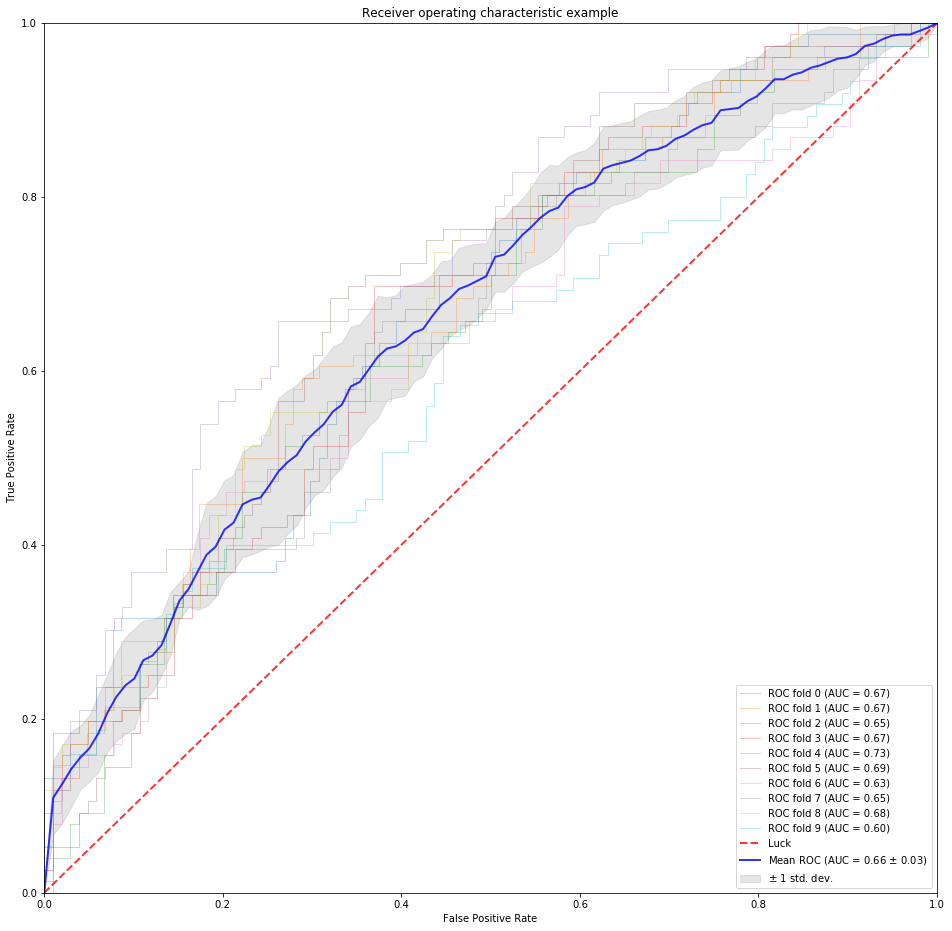

In [57]:
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, random_state=42)

plt.figure(figsize=(16, 16))

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = _fit_predict_cached(clone(pipe), X, y, train, test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Classification using parcellations age label

In [15]:
import pandas as pd

In [16]:
df_parcellations = pd.read_csv('parcellations.csv', index_col=0)

In [17]:
df_data = df[['Label', 'Age', 'Gender', 'TIV']]

In [18]:
df_data = pd.concat([df_data, df_parcellations], axis=1)

In [19]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

In [20]:
pipe = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=42),
                     LinearSVR(random_state=42))

In [24]:
score = cross_validate(pipe, df_data[[str(i) for i in range(20000)]], df_data['Age'],
                       cv=10,
                       scoring=['r2', 'neg_median_absolute_error', 'neg_mean_squared_error'],
                       n_jobs=-1, return_train_score=True, verbose=100)

Pickling array (shape=(20000,), dtype=object).
Pickling array (shape=(1792,), dtype=object).
Memmaping (shape=(20000, 1792), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_31583_140257114406472/31583-140257039550784-5632248b42f997309867056029f7ae36.pkl
Pickling array (shape=(20000,), dtype=object).
Pickling array (shape=(1792,), dtype=int64).
Pickling array (shape=(1792,), dtype=object).
Pickling array (shape=(1612,), dtype=int64).
Pickling array (shape=(180,), dtype=int64).
Pickling array (shape=(20000,), dtype=object).
Pickling array (shape=(1792,), dtype=object).
[CV]  ................................................................
[CV]  ................................................................
Memmaping (shape=(20000, 1792), dtype=float64) to old file /dev/shm/joblib_memmaping_pool_31583_140257114406472/31583-140257039550784-5632248b42f997309867056029f7ae36.pkl
Pickling array (shape=(20000,), dtype=object).
Pickling array (shape=(1792,), dtype=int64).
Pickling ar

In [25]:
score

{'fit_time': array([  87.86309052,   89.9951179 ,   99.95180011,   94.97719002,
          94.96783972,   86.87545586,  103.06999564,  100.1704371 ,
          90.15193462,   96.34870815]),
 'score_time': array([ 36.5462079 ,  37.00145793,  35.38290405,  35.41267323,
         36.40792036,  35.22285056,  36.57541108,  36.41899729,
         37.95827079,  35.82614183]),
 'test_neg_mean_squared_error': array([-42.7386496 , -44.16088632, -45.39329641, -43.85826616,
        -43.11896253, -49.05236978, -49.3162012 , -33.14503472,
        -49.02515099, -36.26163753]),
 'test_neg_median_absolute_error': array([-4.53500157, -4.57146373, -4.76096228, -4.18414088, -5.04245248,
        -5.2724253 , -4.9367686 , -3.75073702, -4.39837452, -4.09389543]),
 'test_r2': array([ 0.72615452,  0.73362283,  0.71758549,  0.7309195 ,  0.71379212,
         0.69693201,  0.6926347 ,  0.79020331,  0.69712214,  0.78538602]),
 'train_neg_mean_squared_error': array([ -8.80173095e-06,  -1.18582522e-05,  -7.37547089e-06,


In [26]:
print('R2 on training: {:.3f} +- {:.3f}'.format(np.mean(score['train_r2']),
                                                np.std(score['train_r2'])))

R2 on training: 1.000 +- 0.000


In [27]:
print('R2 on testing: {:.3f} +- {:.3f}'.format(np.mean(score['test_r2']),
                                               np.std(score['test_r2'])))

R2 on testing: 0.728 +- 0.033


In [28]:
print('MAD on training: {:.3f} +- {:.3f}'.format(np.mean(score['train_neg_median_absolute_error']),
                                                 np.std(score['train_neg_median_absolute_error'])))

MAD on training: -0.001 +- 0.000


In [29]:
print('MAD on testing: {:.3f} +- {:.3f}'.format(np.mean(score['test_neg_median_absolute_error']),
                                                np.std(score['test_neg_median_absolute_error'])))

MAD on testing: -4.555 +- 0.443


In [30]:
print('MSE on training: {:.3f} +- {:.3f}'.format(np.mean(score['train_neg_mean_squared_error']),
                                                 np.std(score['train_neg_mean_squared_error'])))

MSE on training: -0.000 +- 0.000


In [31]:
print('MSE on testing: {:.3f} +- {:.3f}'.format(np.mean(score['test_neg_mean_squared_error']),
                                                np.std(score['test_neg_mean_squared_error'])))

MSE on testing: -43.607 +- 5.095


In [21]:
from sklearn.model_selection import cross_val_predict

X, y = df_data[[str(i) for i in range(20000)]], df_data['Age']
y_pred = cross_val_predict(pipe, X, y, cv=10, n_jobs=-1)

/home/glemaitre/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


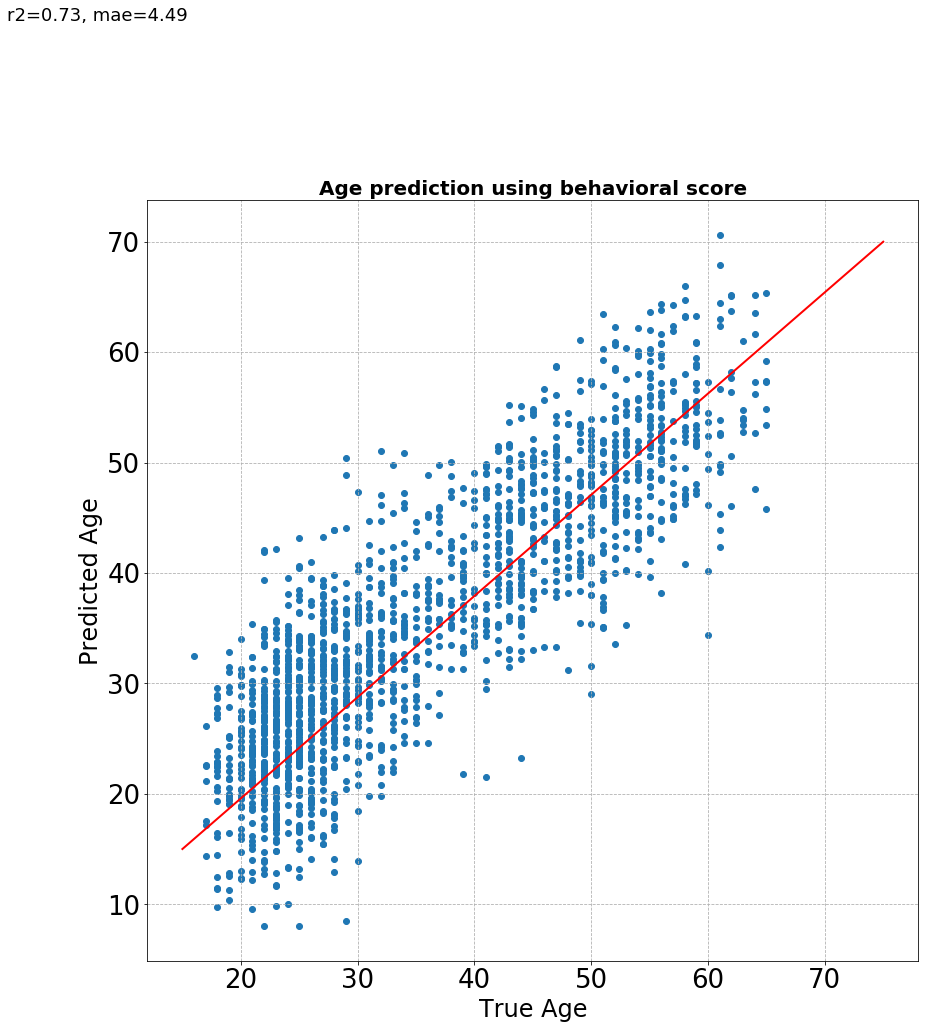

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error

f = plt.figure(figsize=(12, 12))
ax = f.gca()
ax.scatter(y, y_pred)
ax.plot([15, 75], [15, 70], 'r', linewidth=2)
ax.grid(linestyle='--')
xlabels = ['%u' % x for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, fontsize=26)
labels = ['%u' % x for x in ax.get_yticks()]
ax.set_yticklabels(labels, fontsize=26)
ax.set_ylabel('Predicted Age', fontsize=24)
ax.set_xlabel('True Age', fontsize=24)
ax.text(0, 90, 'r2=%.2f, mae=%.2f' % (r2_score(y, y_pred), median_absolute_error(y, y_pred)),
        fontsize=18)
ax.set_title('Age prediction using behavioral score',
             fontsize=20, fontweight='bold')
f.tight_layout()
f.show()

## Simple logistic regression the masked data

In [66]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from nilearn.input_data import MultiNiftiMasker

In [67]:
from sklearn.externals.joblib import Memory
memory = Memory('./cache')

In [68]:
def _load_subjects_data(filenames_subject):
    path_mask = '/home/glemaitre/Documents/data/pac_2018/public_data/mask.nii.gz'
    parcellations = Parcellations(method='ward', n_parcels=20000, mask=path_mask)
    # multi_masker = MultiNiftiMasker(mask_img=path_mask, mask_strategy='background')
    # X = multi_masker.fit_transform(filenames_subject.tolist())
    return parcellations.fit_transform(filenames_subject)
_load_subjects_data_cached = memory.cache(_load_subjects_data)

In [49]:
loader_2 = FunctionTransformer(func=_load_subjects_data, validate=False)

In [50]:
x = loader_2.fit_transform(df['t1'].iloc[:10])

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Parcellations] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] C

In [ ]:
x.shape

In [29]:
loader = FunctionTransformer(func=_load_subjects_data_cached, validate=False)

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

In [32]:
pipe = make_pipeline(StandardScaler(), LogisticRegressionCV())

In [33]:
score = cross_validate(pipe, X_t1, df['Label'], cv=StratifiedKFold(n_splits=10),
                       scoring=['roc_auc'], n_jobs=-1,
                       return_train_score=True, verbose=1)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fa345128540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/glemaitre/miniconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/glemai.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fa345128540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/glemaitre/miniconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/glemai.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 8, 33, 53, 673707, tzinfo=tzutc()), 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'session': '6EEB6055E74544CB886C688FF8E9D248', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6EEB6055E74544CB886C688FF8E9D248']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 8, 33, 53, 673707, tzinfo=tzutc()), 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'session': '6EEB6055E74544CB886C688FF8E9D248', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6EEB6055E74544CB886C688FF8E9D248'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 8, 33, 53, 673707, tzinfo=tzutc()), 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'session': '6EEB6055E74544CB886C688FF8E9D248', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0B496AFDE0D34BCD86C982A1C21B1E5C', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="score = cross_validate(pipe, X_t1, df['Label'], ...              return_train_score=True, verbose=1)", store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-33-02a9a3a86965>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fa2149c8e48, executi..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fa2142c3a50, file "<ipython-input-33-02a9a3a86965>", line 1>
        result = <ExecutionResult object at 7fa2149c8e48, executi..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fa2142c3a50, file "<ipython-input-33-02a9a3a86965>", line 1>, result=<ExecutionResult object at 7fa2149c8e48, executi..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fa2142c3a50, file "<ipython-input-33-02a9a3a86965>", line 1>
        self.user_global_ns = {'FormatStrFormatter': <class 'matplotlib.ticker.FormatStrFormatter'>, 'In': ['', "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt\nimport seaborn as sns", 'from datasets import create_dataframe_pac_2018', "df = create_dataframe_pac_2018(\n    path_data_ni...ts/data/pac_2018/PAC2018_Covariates_Upload.xlsx')", 'df.head()', r"df_gender = df['Gender'].value_counts().to_frame().T.rename(index={'Gender': 'public\nset'})", 'df_gender_norm = df_gender.div(df_gender.sum(axis=1), axis=0)', "with sns.plotting_context('poster', font_scale=1...n={:}'.format(total_patients), (0, value + 0.56))", r"df_age = df[['Age', 'Gender']].rename(index={'Age': 'public\nset'})", 'df_age[""] = ""', 'df_age.head()', 'from matplotlib.ticker import FormatStrFormatter...   ax.xaxis.set_major_locator(plt.MaxNLocator(5))', r"df_label = df['Label'].value_counts().to_frame().T.rename(index={'Label': 'public\nset'})", 'df_label_norm = df_label.div(df_label.sum(axis=1), axis=0)', "with sns.plotting_context('poster', font_scale=1...n={:}'.format(total_patients), (0, value + 0.56))", "from nilearn import image\npath_mask = '/home/gle...t1 = parcellations.fit_transform(df['t1'].values)", "from nilearn import image\nfrom nilearn.regions i...t1 = parcellations.fit_transform(df['t1'].values)", 'X_t1.shape', 'import numpy as np', "np.save('parcellations.npy', X_t1)", ...], 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {4:               Label  Age  Gender          TIV  \...ome/glemaitre/Documents/data/pac_2018/public...  , 10:               Age  Gender  
PAC_ID              ...8_0005   33       1  
PAC2018_0006   61       2  , 17: (1792, 20000), 25:               Label  Age  Gender          TIV  \...ome/glemaitre/Documents/data/pac_2018/public...  , 28:                  0         1         2         3...3  0.344543  0.491920  

[5 rows x 20000 columns]}, 'Parcellations': <class 'nilearn.regions.parcellations.Parcellations'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X_t1': array([[ 0.05032844,  0.05478869,  0.11377602, ....  0.43083076,
         0.62880688,  0.60980848]]), '_':                  0         1         2         3...3  0.344543  0.491920  

[5 rows x 20000 columns], '_10':               Age  Gender  
PAC_ID              ...8_0005   33       1  
PAC2018_0006   61       2  , ...}
        self.user_ns = {'FormatStrFormatter': <class 'matplotlib.ticker.FormatStrFormatter'>, 'In': ['', "get_ipython().magic('matplotlib inline')\nimport matplotlib.pyplot as plt\nimport seaborn as sns", 'from datasets import create_dataframe_pac_2018', "df = create_dataframe_pac_2018(\n    path_data_ni...ts/data/pac_2018/PAC2018_Covariates_Upload.xlsx')", 'df.head()', r"df_gender = df['Gender'].value_counts().to_frame().T.rename(index={'Gender': 'public\nset'})", 'df_gender_norm = df_gender.div(df_gender.sum(axis=1), axis=0)', "with sns.plotting_context('poster', font_scale=1...n={:}'.format(total_patients), (0, value + 0.56))", r"df_age = df[['Age', 'Gender']].rename(index={'Age': 'public\nset'})", 'df_age[""] = ""', 'df_age.head()', 'from matplotlib.ticker import FormatStrFormatter...   ax.xaxis.set_major_locator(plt.MaxNLocator(5))', r"df_label = df['Label'].value_counts().to_frame().T.rename(index={'Label': 'public\nset'})", 'df_label_norm = df_label.div(df_label.sum(axis=1), axis=0)', "with sns.plotting_context('poster', font_scale=1...n={:}'.format(total_patients), (0, value + 0.56))", "from nilearn import image\npath_mask = '/home/gle...t1 = parcellations.fit_transform(df['t1'].values)", "from nilearn import image\nfrom nilearn.regions i...t1 = parcellations.fit_transform(df['t1'].values)", 'X_t1.shape', 'import numpy as np', "np.save('parcellations.npy', X_t1)", ...], 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {4:               Label  Age  Gender          TIV  \...ome/glemaitre/Documents/data/pac_2018/public...  , 10:               Age  Gender  
PAC_ID              ...8_0005   33       1  
PAC2018_0006   61       2  , 17: (1792, 20000), 25:               Label  Age  Gender          TIV  \...ome/glemaitre/Documents/data/pac_2018/public...  , 28:                  0         1         2         3...3  0.344543  0.491920  

[5 rows x 20000 columns]}, 'Parcellations': <class 'nilearn.regions.parcellations.Parcellations'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X_t1': array([[ 0.05032844,  0.05478869,  0.11377602, ....  0.43083076,
         0.62880688,  0.60980848]]), '_':                  0         1         2         3...3  0.344543  0.491920  

[5 rows x 20000 columns], '_10':               Age  Gender  
PAC_ID              ...8_0005   33       1  
PAC2018_0006   61       2  , ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/home/glemaitre/Documents/work/code/predictive-analytics-competition/<ipython-input-33-02a9a3a86965> in <module>()
      1 score = cross_validate(pipe, X_t1, df['Label'], cv=StratifiedKFold(n_splits=10),
      2                        scoring=['roc_auc'], n_jobs=-1,
----> 3                        return_train_score=True, verbose=1)

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_validate(estimator=Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), X=array([[ 0.05032844,  0.05478869,  0.11377602, ....  0.43083076,
         0.62880688,  0.60980848]]), y=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20...2240    1
Name: Label, Length: 1792, dtype: int64, groups=None, scoring=['roc_auc'], cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1, verbose=1, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=True)
    190     scores = parallel(
    191         delayed(_fit_and_score)(
    192             clone(estimator), X, y, scorers, train, test, verbose, None,
    193             fit_params, return_train_score=return_train_score,
    194             return_times=True)
--> 195         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X = array([[ 0.05032844,  0.05478869,  0.11377602, ....  0.43083076,
         0.62880688,  0.60980848]])
        y = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20...2240    1
Name: Label, Length: 1792, dtype: int64
        groups = None
    196 
    197     if return_train_score:
    198         train_scores, test_scores, fit_times, score_times = zip(*scores)
    199         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri May  4 10:36:15 2018
PID: 4307               Python 3.6.3: /home/glemaitre/miniconda3/bin/python
...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.43083076,
          0.62880688,  0.60980848]]), PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20...2240    1
Name: Label, Length: 1792, dtype: int64, {'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 174,  178,  179, ..., 1789, 1790, 1791]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...70, 171, 172, 173, 175, 176, 177, 180, 181, 183]), 1, None, None), {'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.43083076,
          0.62880688,  0.60980848]]), PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20...2240    1
Name: Label, Length: 1792, dtype: int64, {'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 174,  178,  179, ..., 1789, 1790, 1791]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...70, 171, 172, 173, 175, 176, 177, 180, 181, 183]), 1, None, None)
        kwargs = {'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), X=memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.43083076,
          0.62880688,  0.60980848]]), y=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20...2240    1
Name: Label, Length: 1792, dtype: int64, scorer={'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, train=array([ 174,  178,  179, ..., 1789, 1790, 1791]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...70, 171, 172, 173, 175, 176, 177, 180, 181, 183]), verbose=1, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    462                              " make sure that it has been spelled correctly.)")
    463 
    464     else:
    465         fit_time = time.time() - start_time
    466         # _score will return dict if is_multimetric is True
--> 467         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))])
        X_test = memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]])
        y_test = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
        scorer = {'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}
        is_multimetric = True
    468         score_time = time.time() - start_time - fit_time
    469         if return_train_score:
    470             train_scores = _score(estimator, X_train, y_train, scorer,
    471                                   is_multimetric)

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), X_test=memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]]), y_test=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, scorer={'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}, is_multimetric=True)
    497 
    498     Will return a single float if is_multimetric is False and a dict of floats,
    499     if is_multimetric is True
    500     """
    501     if is_multimetric:
--> 502         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))])
        X_test = memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]])
        y_test = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
        scorer = {'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)}
    503     else:
    504         if y_test is None:
    505             score = scorer(estimator, X_test)
    506         else:

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _multimetric_score(estimator=Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), X_test=memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]]), y_test=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, scorers={'roc_auc': make_scorer(roc_auc_score, needs_threshold=True)})
    527 
    528     for name, scorer in scorers.items():
    529         if y_test is None:
    530             score = scorer(estimator, X_test)
    531         else:
--> 532             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(roc_auc_score, needs_threshold=True)
        estimator = Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))])
        X_test = memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]])
        y_test = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
    533 
    534         if hasattr(score, 'item'):
    535             try:
    536                 # e.g. unwrap memmapped scalars

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py in __call__(self=make_scorer(roc_auc_score, needs_threshold=True), clf=Pipeline(memory=None,
     steps=[('standardscal...g=None, solver='lbfgs', tol=0.0001, verbose=0))]), X=memmap([[ 0.05032844,  0.05478869,  0.11377602, ... 0.36870119,
          0.4631602 ,  0.89250596]]), y=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, sample_weight=None)
    201         if sample_weight is not None:
    202             return self._sign * self._score_func(y, y_pred,
    203                                                  sample_weight=sample_weight,
    204                                                  **self._kwargs)
    205         else:
--> 206             return self._sign * self._score_func(y, y_pred, **self._kwargs)
        self._sign = 1
        self._score_func = <function roc_auc_score>
        y = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
        y_pred = array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018])
        self._kwargs = {}
    207 
    208     def _factory_args(self):
    209         return ", needs_threshold=True"
    210 

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py in roc_auc_score(y_true=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, y_score=array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018]), average='macro', sample_weight=None)
    260                                         sample_weight=sample_weight)
    261         return auc(fpr, tpr, reorder=True)
    262 
    263     return _average_binary_score(
    264         _binary_roc_auc_score, y_true, y_score, average,
--> 265         sample_weight=sample_weight)
        sample_weight = None
    266 
    267 
    268 def _binary_clf_curve(y_true, y_score, pos_label=None, sample_weight=None):
    269     """Calculate true and false positives per binary classification threshold.

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/base.py in _average_binary_score(binary_metric=<function roc_auc_score.<locals>._binary_roc_auc_score>, y_true=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, y_score=array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018]), average='macro', sample_weight=None)
     70     y_type = type_of_target(y_true)
     71     if y_type not in ("binary", "multilabel-indicator"):
     72         raise ValueError("{0} format is not supported".format(y_type))
     73 
     74     if y_type == "binary":
---> 75         return binary_metric(y_true, y_score, sample_weight=sample_weight)
        binary_metric = <function roc_auc_score.<locals>._binary_roc_auc_score>
        y_true = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
        y_score = array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018])
        sample_weight = None
     76 
     77     check_consistent_length(y_true, y_score, sample_weight)
     78     y_true = check_array(y_true)
     79     y_score = check_array(y_score)

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py in _binary_roc_auc_score(y_true=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, y_score=array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018]), sample_weight=None)
    255         if len(np.unique(y_true)) != 2:
    256             raise ValueError("Only one class present in y_true. ROC AUC score "
    257                              "is not defined in that case.")
    258 
    259         fpr, tpr, tresholds = roc_curve(y_true, y_score,
--> 260                                         sample_weight=sample_weight)
        sample_weight = None
    261         return auc(fpr, tpr, reorder=True)
    262 
    263     return _average_binary_score(
    264         _binary_roc_auc_score, y_true, y_score, average,

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py in roc_curve(y_true=PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64, y_score=array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018]), pos_label=None, sample_weight=None, drop_intermediate=True)
    505     >>> thresholds
    506     array([ 0.8 ,  0.4 ,  0.35,  0.1 ])
    507 
    508     """
    509     fps, tps, thresholds = _binary_clf_curve(
--> 510         y_true, y_score, pos_label=pos_label, sample_weight=sample_weight)
        y_true = PAC_ID
PAC2018_0001    1
PAC2018_0002    1
PAC20..._0228    1
Name: Label, Length: 180, dtype: int64
        y_score = array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018])
        pos_label = None
        sample_weight = None
    511 
    512     # Attempt to drop thresholds corresponding to points in between and
    513     # collinear with other points. These are always suboptimal and do not
    514     # appear on a plotted ROC curve (and thus do not affect the AUC).

...........................................................................
/home/glemaitre/miniconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py in _binary_clf_curve(y_true=array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1,... 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]), y_score=array([ 0.6371658 , -1.28657843,  0.40198129, -0...08239691, -1.603663  , -0.91461146,  0.60973018]), pos_label=None, sample_weight=None)
    314         not (np.array_equal(classes, [0, 1]) or
    315              np.array_equal(classes, [-1, 1]) or
    316              np.array_equal(classes, [0]) or
    317              np.array_equal(classes, [-1]) or
    318              np.array_equal(classes, [1]))):
--> 319         raise ValueError("Data is not binary and pos_label is not specified")
    320     elif pos_label is None:
    321         pos_label = 1.
    322 
    323     # make y_true a boolean vector

ValueError: Data is not binary and pos_label is not specified
___________________________________________________________________________

In [33]:
#df.head()
score

NameError: name 'score' is not defined

In [30]:
df['Label'].value_counts()

1    1033
2     759
Name: Label, dtype: int64

## stacking some predictor

In [ ]:
from sklearn.base import BaseEstimator